# Aprendizaje Supervisado
<b>Regresión Lineal</b>

La Regresión Lineal es un método estadístico para predecir valores numéricos basados en un entrenamiento.

In [59]:
# 0. Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
%pip install scikit-learn
from sklearn import linear_model

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
# 1. Cargamos el CSV en un DataFrame
df = pd.read_csv("propiedades_castro_urdiales.csv")

# Cambio el nombre de sus columnas
df.rename(columns={
    "Metros cuadrados":"Area",
}, inplace=True)

df.head()

,Título,Precio,Area,Habitaciones,Garaje
0,"Piso en calle de la Ronda, 56, Centro, Castro-...",495.000€,128 m²,4 hab.,Si
1,Chalet pareado en calle Aureliano Linares Riva...,750.000€,400 m²,6 hab.,Si
2,Chalet pareado en calle Aureliano Linares Riva...,650.000€,350 m²,5 hab.,No
3,"Piso en calle Arturo Dúo Vital, 18, Centro, Ca...",175.000€,51 m²,2 hab.,No
4,"Piso en paseo Ocharan Mazas, 2, Centro, Castro...",483.000€,138 m²,4 hab.,Si


In [61]:
# 2. Convertimos el Area y el Precio a números
df["Area"] = df["Area"].str.replace(" m²","").astype(float)
df["Precio"] = df["Precio"].str.replace("€","").str.replace(".","").astype(float)
df["Habitaciones"] = df["Habitaciones"].str.replace(" hab.","").astype(int)
df = df.drop(columns="Garaje")
df.head()

,Título,Precio,Area,Habitaciones
0,"Piso en calle de la Ronda, 56, Centro, Castro-...",495000.0,128.0,4
1,Chalet pareado en calle Aureliano Linares Riva...,750000.0,400.0,6
2,Chalet pareado en calle Aureliano Linares Riva...,650000.0,350.0,5
3,"Piso en calle Arturo Dúo Vital, 18, Centro, Ca...",175000.0,51.0,2
4,"Piso en paseo Ocharan Mazas, 2, Centro, Castro...",483000.0,138.0,4


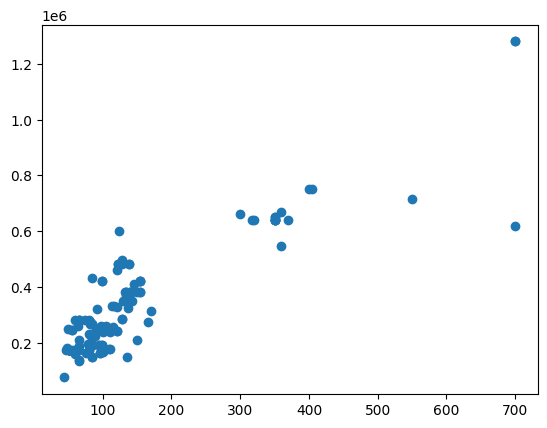

In [62]:
# 3. Vamos a graficar con matplotlib
plt.scatter(df["Area"], df["Precio"]);

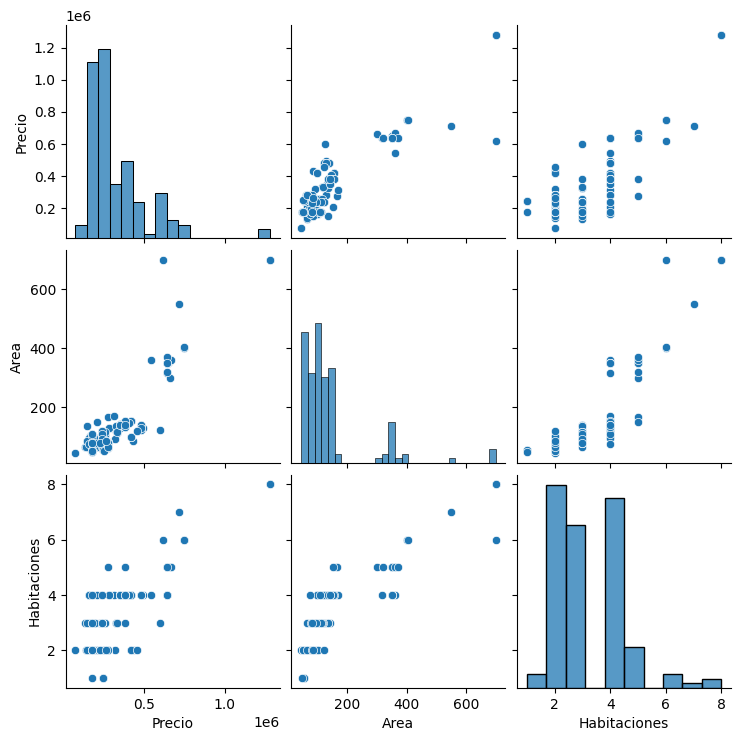

In [63]:
# Comparar las variables entre sí

import seaborn as sns

sns.pairplot(df, kind="scatter")
plt.show()

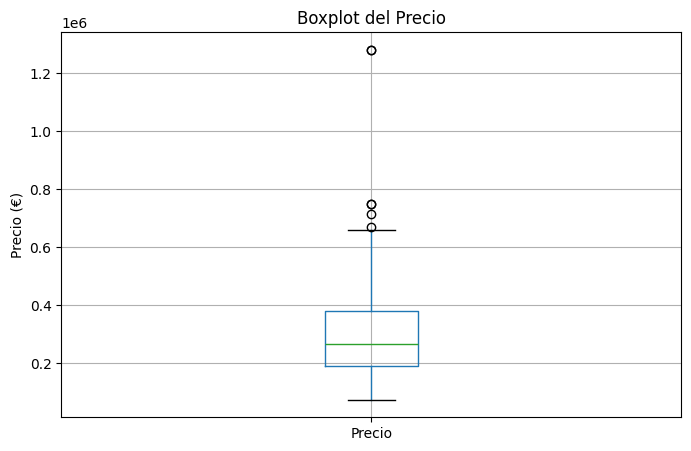

In [64]:
# Vamos a visualizar el boxplot de el precio
plt.figure(figsize=(8,5))
df.boxplot(column=["Precio"])
plt.title("Boxplot del Precio")
plt.ylabel("Precio (€)")
plt.show()

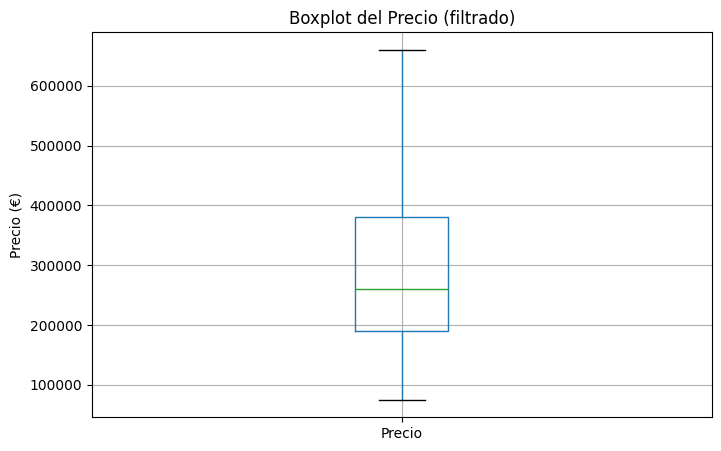

In [65]:
# 4. Identificamos y quitamos valores atípicos o anómales
Q1 = df["Precio"].quantile(0.25)
Q3 = df["Precio"].quantile(0.75)
# Rango intercuartílico (IQR)
IQR = Q3 - Q1

# A partir de este rango, podemos obtener el rango inferior y superior para los valores no atípicos
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

df_filtrado = df[(df["Precio"] >= limite_inferior) & (df["Precio"] <= limite_superior)]

plt.figure(figsize=(8,5))
df_filtrado.boxplot(column=["Precio"])
plt.title("Boxplot del Precio (filtrado)")
plt.ylabel("Precio (€)")
plt.show()


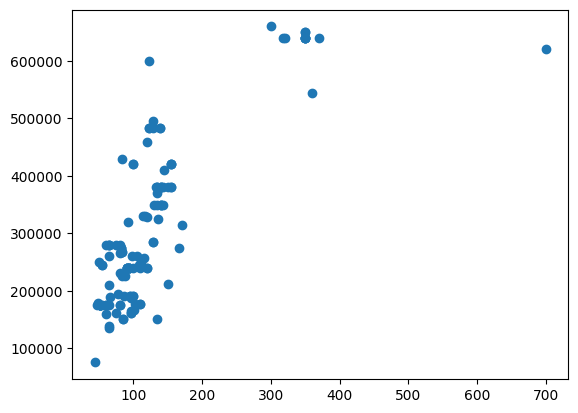

In [66]:
plt.scatter(df_filtrado["Area"], df_filtrado["Precio"]);

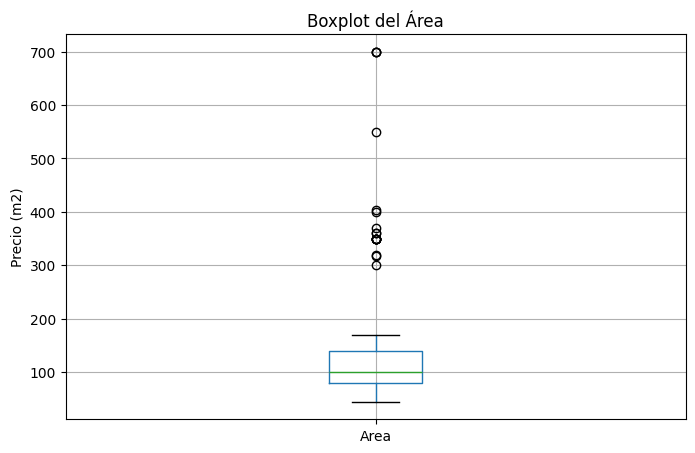

In [67]:
# Vamos a visualizar el boxplot de el precio
plt.figure(figsize=(8,5))
df.boxplot(column=["Area"])
plt.title("Boxplot del Área")
plt.ylabel("Precio (m2)")
plt.show()

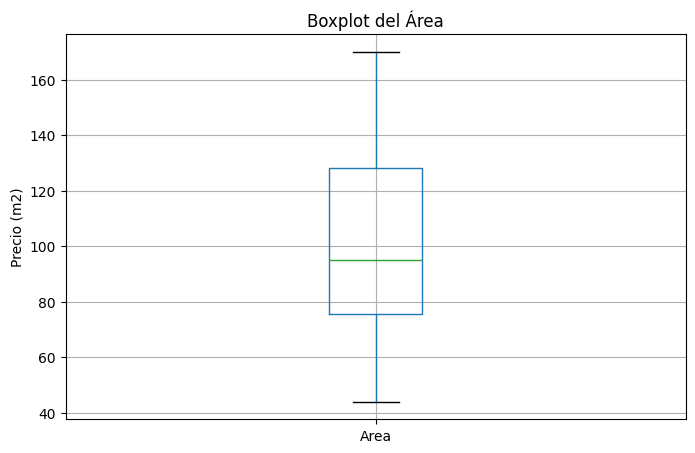

In [68]:
# 4. Identificamos y quitamos valores atípicos o anómales
Q1 = df_filtrado["Area"].quantile(0.25)
Q3 = df_filtrado["Area"].quantile(0.75)
# Rango intercuartílico (IQR)
IQR = Q3 - Q1

# A partir de este rango, podemos obtener el rango inferior y superior para los valores no atípicos
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

df_filtrado = df_filtrado[(df_filtrado["Area"] >= limite_inferior) &  (df_filtrado["Area"] <= limite_superior)]

# Vamos a visualizar el boxplot de el precio
plt.figure(figsize=(8,5)) 
df_filtrado.boxplot(column=["Area"])
plt.title("Boxplot del Área")
plt.ylabel("Precio (m2)")
plt.show()

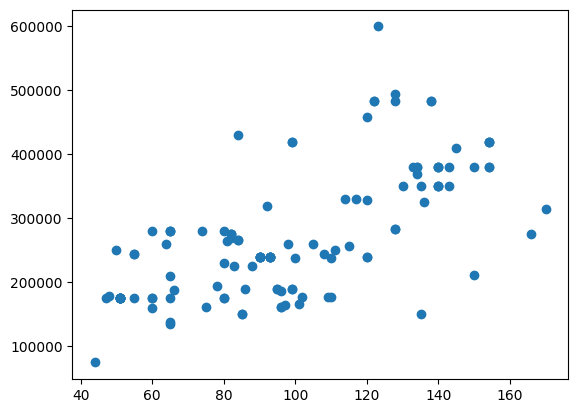

In [69]:
plt.scatter(df_filtrado["Area"], df_filtrado["Precio"])

Como podemos observar, a medidad que un piso tiene más área (eje X), tiene un precio (eje Y) mayor.

Sin embargo, no podemos decir que esta relación es perfectamente proporcional.

En este primer ejemplo vamos a utilizar el método de la regresión lineal para crear una línea recta en este gráfico que represente el menor error cuadrático medio.

Antes de utilizar el modelo, vamos a entrenarlo:

In [70]:
# Conjunto de datos de entrada:

X = df_filtrado[["Area"]]

# ¿Por qué X mayúscula? Porque lo que estoy creando es un dataframe
# ¿Por qué utilizamos [[]]? Porque asií transformamos un conjunto de datos de varias columnas a sólo una

# Conjunto de variables dependientes

y = df_filtrado["Precio"]

In [71]:
modelo = linear_model.LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [72]:
# Probamos el modelo de Regresión Lineal obtenido con el conjunto de datos en entrenamiento X, y

nuevo_area = 80

nuevo_piso = pd.DataFrame({
    "Area": [nuevo_area]
})


# Realizamos la predicción
prediccion = modelo.predict(nuevo_piso)
print(f"El precio predicho para un área de {nuevo_area} m2 es de: {prediccion[0]:,.2f}€.")



El precio predicho para un área de 80 m2 es de: 233,069.03€.


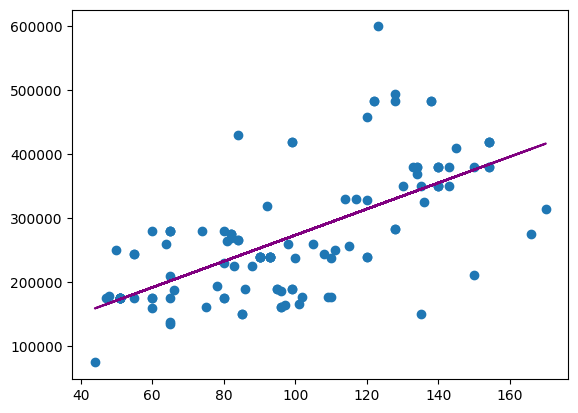

In [73]:
# representamos la recta de predicción frente al scatter
plt.scatter(df_filtrado["Area"], df_filtrado["Precio"])
plt.plot(df_filtrado["Area"], modelo.predict(X), color="purple");

Vemos que el resuktado no es tan aproximado, por lo que vamos a intentar con la Regresión Polinómica

c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



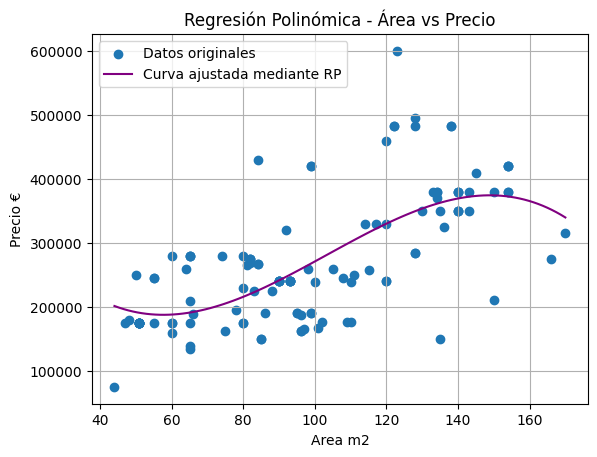

In [74]:
# Importamos las librearias para utilizar la Regresión Polinómica

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# Creamos un modelo de Regresión Polinomica de grado 3
modelo = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Entrenamos el modelo
modelo.fit(X,y)

X_range = np.linspace(min(df_filtrado["Area"]), max(df_filtrado["Area"]), 100).reshape(-1, 1)
y_pred = modelo.predict(X_range)

# Dibujamos el scatter vs la preddicción
plt.scatter(df_filtrado["Area"], df_filtrado["Precio"], label="Datos originales")
plt.plot(X_range, y_pred, label="Curva ajustada mediante RP", color="purple")
plt.xlabel("Area m2")
plt.ylabel("Precio €")
plt.title("Regresión Polinómica - Área vs Precio")
plt.legend()
plt.grid()
plt.show()

In [75]:
# Probamos nuestro modelo con un ejemplo

nuevo_area = 80

nuevo_piso = pd.DataFrame({
    "Area": [nuevo_area]
})


# Realizamos la predicción
prediccion = modelo.predict(nuevo_piso)
print(f"El precio predicho para un área de {nuevo_area} m2 es de: {prediccion[0]:,.2f}€.")

El precio predicho para un área de 80 m2 es de: 215,818.99€.


Somos ambiciosos y queremos ajustarlo un poco más, por lo que vamos a añadirle una nueva dimensión "Habitaciones"

In [76]:
# Vamos a añadir "Habitaciones" al conjunto de variables independientes
X = df_filtrado[["Area", "Habitaciones"]]
y = df_filtrado["Precio"]

# Vamos a crear un modelo d eregresión polinominal con escalado
from sklearn.preprocessing import StandardScaler

modelo = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression())

# Entrenamos el modelo
modelo.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



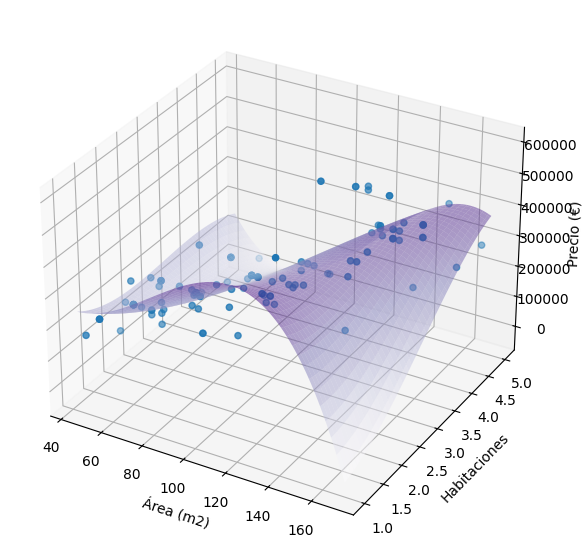

In [77]:
# Creamos un rango de nuevo para cada variabel
area_range = np.linspace(min(df_filtrado["Area"]), max(df_filtrado["Area"]), 100)
habitaciones_range = np.linspace(min(df_filtrado["Habitaciones"]), max(df_filtrado["Habitaciones"]), 100)
area_grid, habitaciones_grid = np.meshgrid(area_range, habitaciones_range)
X_grid = np.c_[area_grid.ravel(), habitaciones_grid.ravel()]

# Obtener las predicciones
y_pred = modelo.predict(X_grid).reshape(area_grid.shape)

# Representamos el plano en una gráfica 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_filtrado["Area"], df_filtrado["Habitaciones"], df_filtrado["Precio"], label="Datos originales")
ax.plot_surface(area_grid, habitaciones_grid, y_pred, alpha=0.5, cmap="Purples")

ax.set_xlabel("Área (m2)")
ax.set_ylabel("Habitaciones")
ax.set_zlabel("Precio (€)")
plt.show()

In [78]:
# Como no podemos interactuar con esta gráfica y es posible que nos interese
import plotly.graph_objects as go
fig = go.Figure()

# Agregar los puntos originales
fig.add_trace(
    go.Scatter3d(x = df_filtrado["Area"], y = df_filtrado["Habitaciones"], z = df_filtrado["Precio"],
                 mode = "markers", marker = dict(size=3, color='darkred'), name = "Datos originales")
)

# Agregar el plano de predicción
fig.add_trace(
    go.Surface(x = area_range, y = habitaciones_range, z = y_pred,
                 colorscale="Purples", name = "Datos predichos", opacity=0.7)
)

fig.show()

In [79]:
# Vamos a comprobar la predicción con un ejemplo conocido:
nuevo_area = 80
nuevas_habitaciones = 3

nueva_entrada = np.array([[nuevo_area, nuevas_habitaciones]])

prediccion = modelo.predict(nueva_entrada)
print(f"El precio predicho para un piso de {nuevo_area} m2 y {nuevas_habitaciones} habitaciones, es de: {prediccion[0]:,.2f}")

El precio predicho para un piso de 80 m2 y 3 habitaciones, es de: 181,160.40


c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# One Hot Encoding

Nos permite realizar estimaciones (o regresiones) con variables de tipo binario (1/0)

In [80]:
# Aplicamos one-hot a la variable habitaciones
df_encoded = pd.get_dummies(df, columns=["Habitaciones"], prefix="Hab")

# Mostrar el dataframe resultante
print("\nDataFrame con one-hot encoding:")
df_encoded


DataFrame con one-hot encoding:


,Título,Precio,Area,Hab_1,Hab_2,Hab_3,Hab_4,Hab_5,Hab_6,Hab_7,Hab_8
0,"Piso en calle de la Ronda, 56, Centro, Castro-...",495000.0,128.0,False,False,False,True,False,False,False,False
1,Chalet pareado en calle Aureliano Linares Riva...,750000.0,400.0,False,False,False,False,False,True,False,False
2,Chalet pareado en calle Aureliano Linares Riva...,650000.0,350.0,False,False,False,False,True,False,False,False
3,"Piso en calle Arturo Dúo Vital, 18, Centro, Ca...",175000.0,51.0,False,True,False,False,False,False,False,False
4,"Piso en paseo Ocharan Mazas, 2, Centro, Castro...",483000.0,138.0,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
136,"Piso en calle de Aranzal, Centro, Castro-Urdiales",240000.0,93.0,False,False,True,False,False,False,False,False
137,"Piso en calle Los Caserios, 8, Centro, Castro-...",280000.0,65.0,False,True,False,False,False,False,False,False
138,"Piso en ronda Espinos, 2, Centro, Castro-Urdiales",230000.0,80.0,False,True,False,False,False,False,False,False
139,"Piso en calle de la Ronda, 38, Centro, Castro-...",267000.0,84.0,False,True,False,False,False,False,False,False


In [81]:
# Dividimos entre X e y
X = df_encoded.drop(columns=["Precio", "Título"])
y = df_encoded["Precio"]

In [82]:
# Dividir el dataframe en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [83]:
# Obtenemos los valores de las métricas de evaluación (MSE y el R2 "coeficiente de determinación")
from sklearn.metrics import mean_squared_error, r2_score

# Realizamos predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente R2: {r2:.2f}")

Error cuadrático medio (MSE): 7241794282.65
Coeficiente R2: 0.87
